<a href="https://colab.research.google.com/github/Julien-Mutton/Learning_AI/blob/main/Company_Bankruptcy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("fedesoriano/company-bankruptcy-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/company-bankruptcy-prediction


# Exploratory Data Analysis


In [ ]:
# Load the data base

db = pd.read_csv(path+"/data.csv")

In [ ]:
db.head()

print(db.columns)

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [ ]:
db.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
db.isnull().sum()

,0
Bankrupt?,0
ROA(C) before interest and depreciation before interest,0
ROA(A) before interest and % after tax,0
ROA(B) before interest and depreciation after tax,0
Operating Gross Margin,0
...,...
Liability to Equity,0
Degree of Financial Leverage (DFL),0
Interest Coverage Ratio (Interest expense to EBIT),0
Net Income Flag,0


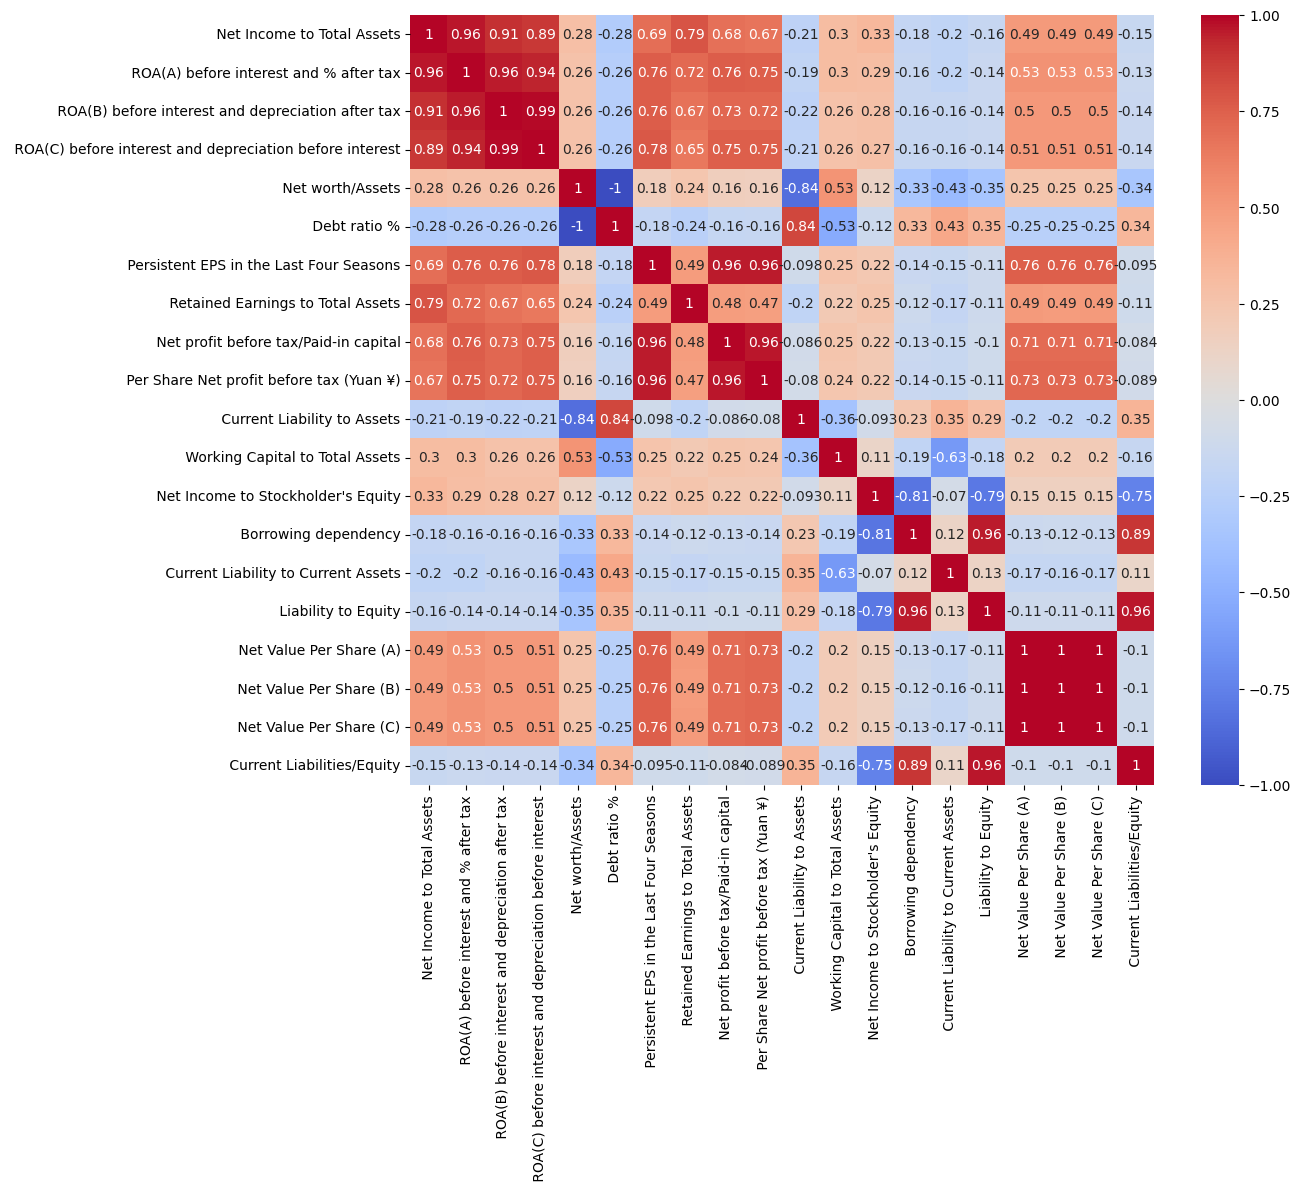

In [ ]:
import pandas as pd
import seaborn as sns
# Get correlation with target
corr_with_target = db.corr()['Bankrupt?'].abs().sort_values(ascending=False)
corr_with_target = corr_with_target.drop('Bankrupt?')

top_k = 20
top_features = corr_with_target.head(top_k).index


# Compute filtered correlation matrix
filtered_corr = db[top_features].corr()

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
# Data Cleaning

from sklearn.preprocessing import StandardScaler
import numpy as np

# .values.reshape(-1,1) would be just for one feature
X = db[top_features]
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled)

y = db['Bankrupt?'].values.ravel()


# MODELS
## LOGISIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



lr = LogisticRegression(C=0.1, penalty='l2', solver='lbfgs', max_iter=200,class_weight='balanced')


# split the data

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2,random_state=43)
lr.fit(x_train, y_train)
print(lr.coef_)
print(lr.intercept_)

y_pred = lr.predict(x_test)
## Model performance
lr.predict_proba(x_test)



[[-2.25431697 -2.04579778 -2.400361   ... -1.27924735 -1.27614661
   0.56848699]
 [-0.30903349 -0.31106786 -0.59844969 ... -0.25187752 -0.25154986
  -0.12379684]
 [-0.82050958 -0.90841978 -1.3199096  ... -0.38187641  0.09082154
   0.24965085]
 ...
 [-0.24751656 -0.37919423 -0.53499599 ...  2.36198354  2.3552559
  -0.332853  ]
 [ 0.10036593  0.01959426  0.00740279 ...  0.68083292  0.67864302
  -0.15690703]
 [ 0.20321881  0.17495561 -0.06561243 ...  0.90170481  0.89891874
  -0.34993117]]
[[-0.47251023  0.71505673 -0.31404573 -0.55654471 -0.56322659  0.56322659
  -0.91014865 -0.1040672  -0.44678873  0.15414514 -0.00467471 -0.31018646
   0.2334218   1.18382135 -0.11694288 -0.29358133 -0.10575989 -0.38642472
   0.09559968 -0.53939562]]
[-2.2183925]


array([[0.26355548, 0.73644452],
       [0.77505531, 0.22494469],
       [0.98746072, 0.01253928],
       ...,
       [0.99146253, 0.00853747],
       [0.61388821, 0.38611179],
       [0.99730332, 0.00269668]])

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))



from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

0.8651026392961877
0.2459016393442623
[[1150  180]
 [   4   30]]


In [ ]:
## KKN
from sklearn.neighbors import KNeighborsClassifier

acc = []

for k in range(1,100):
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(x_train,y_train)
  acc.append(classifier.score(x_test,y_test))


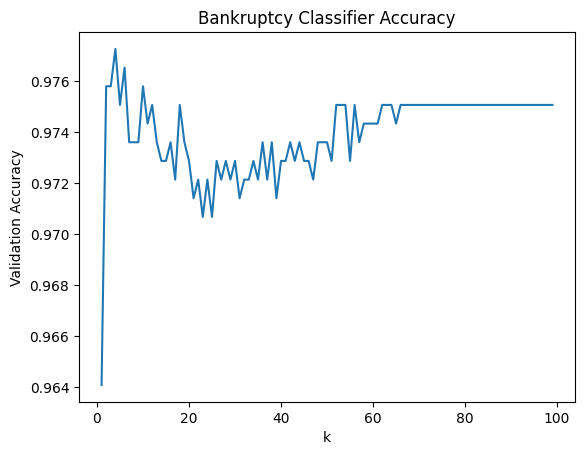

In [ ]:
## Testing KNN

import matplotlib.pyplot as plt

k_list = range(1,100)

plt.plot(k_list,acc)

plt.xlabel("k")

plt.ylabel("Validation Accuracy")

plt.title("Bankruptcy Classifier Accuracy")

plt.show()
